In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np
from keras.optimizers import SGD

/home/amod/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("tumor.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
d = {'M':1,'B':0}
dataset = data.replace(d) #replace M/B with 0 or 1 for the neural net classification
dataset = dataset.drop(['Unnamed: 32'],axis=1) #remove column 32 - unknown purpose
dataset = dataset.drop(['id'],axis=1) #remove the id - not needed for the neural net

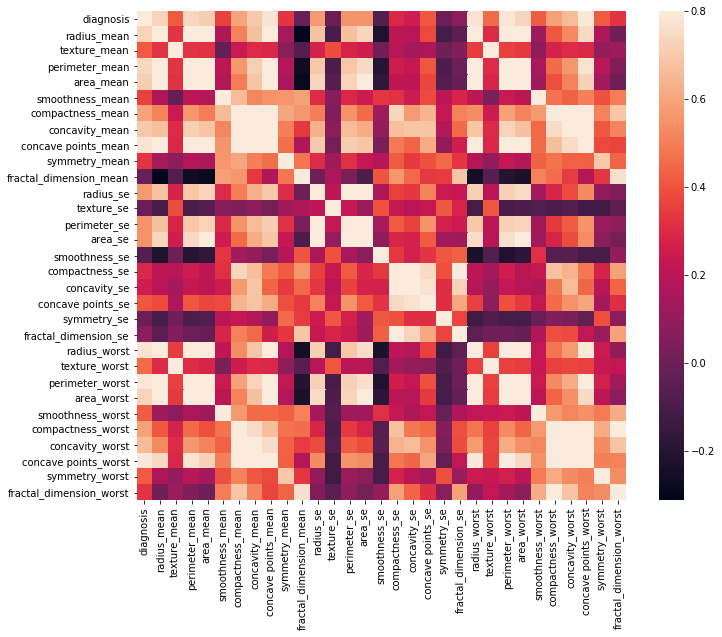

In [5]:
c = dataset.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(c ,vmax=.8,square=True)
plt.show()

In [6]:
x = dataset.drop(['diagnosis'],axis=1)
y = dataset['diagnosis']


In [7]:
x['radius_mean']= ( x['radius_mean'] - x['radius_mean'].mean())/ x['radius_mean'].max()
x['texture_mean'] = (x['texture_mean'] - x['texture_mean'].mean())/x['texture_mean'].max()
x['perimeter_mean'] = (x['perimeter_mean'] - x['perimeter_mean'].mean())/x['perimeter_mean'].max()
x['area_mean'] = (x['area_mean'] - x['area_mean'].mean())/x['area_mean'].max()
x['texture_worst'] = (x['texture_worst'] - x['texture_worst'].mean())/x['texture_worst'].max()
x['perimeter_worst'] = (x['perimeter_worst'] - x['perimeter_worst'].mean())/x['perimeter_worst'].max()
x['area_worst'] = (x['area_worst'] - x['area_worst'].mean())/x['area_worst'].max()

In [9]:
msk = np.random.rand(len(x)) < 0.8
train_x = x[msk]
train_y = y[msk]
test_x = x[~msk]
test_y = y[~msk]

In [10]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(447, 30) (447,) (122, 30) (122,)


In [11]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
history = model.fit(train_x, train_y,validation_split=0.2, epochs=100, batch_size=32)

Train on 357 samples, validate on 90 samples
Epoch 1/100
357/357 [==============================] - 1s 3ms/step - loss: 2.8303 - acc: 0.6246 - val_loss: 0.3894 - val_acc: 0.8333
Epoch 2/100
357/357 [==============================] - 0s 104us/step - loss: 0.5354 - acc: 0.7591 - val_loss: 0.7167 - val_acc: 0.6444
Epoch 3/100
357/357 [==============================] - 0s 116us/step - loss: 0.5968 - acc: 0.7563 - val_loss: 0.4386 - val_acc: 0.8222
Epoch 4/100
357/357 [==============================] - 0s 99us/step - loss: 0.4765 - acc: 0.8179 - val_loss: 0.3162 - val_acc: 0.8778
Epoch 5/100
357/357 [==============================] - 0s 114us/step - loss: 0.4580 - acc: 0.8123 - val_loss: 0.3469 - val_acc: 0.8444
Epoch 6/100
357/357 [==============================] - 0s 134us/step - loss: 0.4340 - acc: 0.8179 - val_loss: 0.3252 - val_acc: 0.8667
Epoch 7/100
357/357 [==============================] - 0s 119us/step - loss: 0.4206 - acc: 0.8263 - val_loss: 0.3415 - val_acc: 0.8667
Epoch 8/100
3

In [14]:
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=64)   
loss_and_metrics


122/122 [==============================] - 0s 54us/step


[0.10364631771064195, 0.9590163944197483]

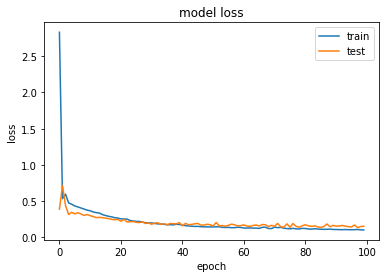

In [15]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
predictions_NN_prob = model.predict(test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

In [18]:
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.9590163934426229


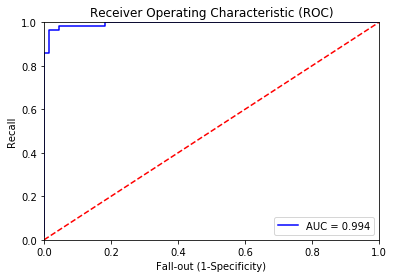

In [19]:
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

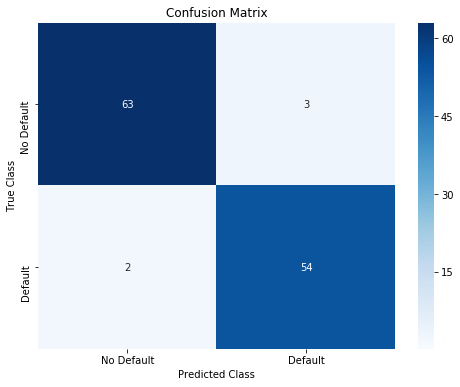

In [20]:
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()